NH3 Temperature Regressors Analysis
REGRESSORS: Temepratura TS, Vegetazione TS (High, Low)

In [2]:
import sys
sys.path.append('..')

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from utils import filters, plots, transformations

In [3]:
# Load the NETCDF dataset
nh3_nc = xr.load_dataset('../../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly_lombardia.nc') # Copernicus (0.1°x0.1°)

In [4]:
# Load the NH3 layer in the region specified by the bounding box
nh3 = nh3_nc.agl

In [5]:
# Load the shapefile
shape = gpd.read_file('../../resources/regione/regione_2015.shp')
shape.head()

,CODICE,NOME,SHAPE_AREA,SHAPE_LEN,geometry
0,03,REGIONE LOMBARDIA,2.386795e+10,1.535219e+06,"MULTIPOLYGON (((460668.530 5015498.348, 460677..."


In [6]:
# Load the NETCDF regressors dataset
ds_temperature = xr.load_dataset('../../datasets/temperature.nc') # Copernicus (0.1°x0.1°)

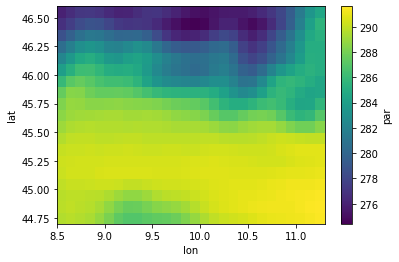

In [7]:
t2m = ds_temperature.t2m
t2m = t2m.transpose("time", "latitude", "longitude")
t2m = t2m.sortby("latitude", ascending=True)  # Riordina
t2m_adjusted = transformations.adjust_var_grid(t2m, nh3.lat, nh3.lon, plot=True)

In [8]:
t2m_adjusted

<xarray.DataArray 'par' (time: 248, lat: 19, lon: 28)>
array([[[279.08547974, 279.01321411, 278.8449707 , ..., 280.45922852,
         280.59112549, 280.69223022],
        [279.30627441, 279.22137451, 279.01544189, ..., 280.39382935,
         280.57296753, 280.70043945],
        [279.51376343, 279.49047852, 279.34216309, ..., 280.39096069,
         280.56918335, 280.72192383],
        ...,
        [268.1043396 , 269.27215576, 270.55236816, ..., 270.62884521,
         272.28259277, 272.9786377 ],
        [266.48431396, 267.15600586, 268.07797241, ..., 269.95449829,
         271.93585205, 273.01834106],
        [265.63217163, 266.13647461, 266.53063965, ..., 269.84741211,
         271.61044312, 272.57785034]],

       [[285.81945801, 285.75894165, 285.50598145, ..., 284.20449829,
         284.09588623, 283.96508789],
        [285.8586731 , 285.87930298, 285.69863892, ..., 284.118927  ,
         284.03692627, 283.90899658],
        [285.19320679, 285.31335449, 285.25949097, ..., 284.08413696,
         283.98812866, 283.87042236],
...
        [285.00543213, 285.93826294, 286.84890747, ..., 290.19296265,
         292.19250488, 292.95330811],
        [283.79504395, 284.396698  , 284.99435425, ..., 288.90591431,
         291.25701904, 292.78393555],
        [283.33508301, 283.71060181, 283.92852783, ..., 288.59399414,
         290.57403564, 291.71881104]],

       [[302.61636353, 302.69216919, 302.45962524, ..., 304.21508789,
         304.33480835, 304.32263184],
        [303.00692749, 303.24969482, 303.1262207 , ..., 304.05438232,
         304.18450928, 304.19512939],
        [302.95175171, 303.29248047, 303.38293457, ..., 303.69659424,
         303.75579834, 303.75357056],
        ...,
        [291.89215088, 293.01760864, 294.10894775, ..., 295.22421265,
         297.15194702, 297.85552979],
        [290.62036133, 291.4888916 , 292.32531738, ..., 294.24926758,
         296.64163208, 298.16323853],
        [289.80456543, 290.47738647, 290.95245361, ..., 294.1477356 ,
         296.17657471, 297.29382324]]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15T12:00:00 ... 2020-08-15T12:00:00
  * lat      (lat) float32 44.75 44.85 44.95 45.05 ... 46.25 46.35 46.45 46.55
  * lon      (lon) float32 8.55 8.65 8.75 8.85 8.95 ... 10.95 11.05 11.15 11.25

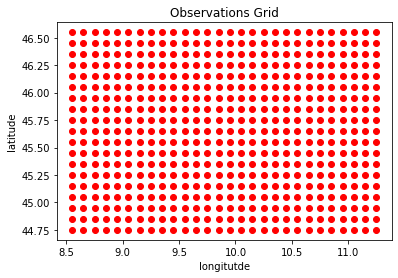

<Figure size 432x288 with 0 Axes>

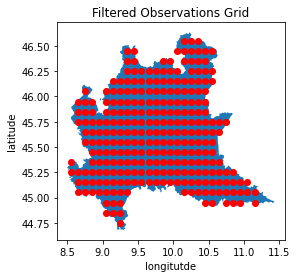

In [9]:
# TODO: Asse orizzontale sbagliato
shape.to_crs(epsg=4326, inplace=True)
data = filters.filter_data_on_shapefile(t2m_adjusted, lats = t2m_adjusted.lat, lons = t2m_adjusted.lon, shp=shape, epsg=4326, plot_grid=True, plot_filter=True)

In [10]:
lats = t2m_adjusted.lat.to_series().tolist()
lons = t2m_adjusted.lon.to_series().tolist()
times = t2m_adjusted.time.to_series().tolist()

t2m_filtered = xr.DataArray(data, coords=[times, lats , lons], dims=['time', 'lat', 'lon'])   
t2m_filtered.attrs = t2m_adjusted.attrs
t2m_filtered

<xarray.DataArray (time: 248, lat: 19, lon: 28)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
         280.56918335,          nan],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
         283.98812866,          nan],
...
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
         303.75579834,          nan],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15T12:00:00 ... 2020-08-15T12:00:00
  * lat      (lat) float64 44.75 44.85 44.95 45.05 ... 46.25 46.35 46.45 46.55
  * lon      (lon) float64 8.55 8.65 8.75 8.85 8.95 ... 10.95 11.05 11.15 11.25